<a href="https://colab.research.google.com/github/sakaars/Smart-Vision-Technology/blob/main/Copy_of_SmartVisionTechnology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extract Data from the given Image Using OCR **

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,666 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

Saving 5.png to 5.png


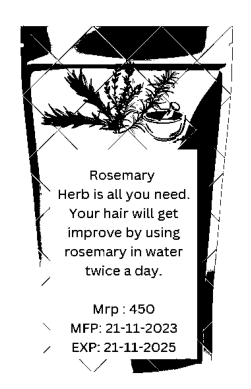

Extracted Text:
   
 

  

Rosemary
Herb is all you need.
Your hair will get
improve by using
rosemary in water

twice a day.

 
     
   
    
    
 

Mrp:450
\ MFP: 21-11-2023
EXP: 21-11-2025
NZ

7



In [ ]:
# Install required libraries
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python-headless
!pip install -q tensorflow keras opencv-python

import pytesseract
import cv2
import matplotlib.pyplot as plt
from google.colab import files


# Step 1: Upload an image
uploaded = files.upload()

# Step 2: Load the image using OpenCV
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Step 3: Preprocess the image for better OCR accuracy
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Optional: Apply thresholding to binarize the image
_, thresh_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the preprocessed image
plt.imshow(cv2.cvtColor(thresh_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Step 4: Extract text using pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
extracted_text = pytesseract.image_to_string(thresh_image)

# Print the extracted text
print("Extracted Text:")
print(extracted_text)

# Extract specific information
import re

# Extract brand name and pack size using regex (modify as per requirements)
brand_name = re.findall(r"(?i)(brand\s*name\s*:?\s*)([A-Za-z0-9 ]+)", extracted_text)
pack_size = re.findall(r"(?i)(pack\s*size\s*:?\s*)([0-9]+\s*(ml|g|kg|l))", extracted_text)

if brand_name:
    print("Brand Name:", brand_name[0][1])
if pack_size:
    print("Pack Size:", pack_size[0][1])


# **Verify the product Expiry Validity**

In [ ]:
# Extract MRP, MFD, and EXP using regex
mrp = re.findall(r"(?i)(mrp[\s:]*₹?\s*[\d.,]+)", extracted_text)
mfd = re.findall(r"(?i)(mfd|manufactured on|manufacturing date)[:\s]*([\d/.-]+)", extracted_text)
exp = re.findall(r"(?i)(exp|expiry|expiry date)[:\s]*([\d/.-]+)", extracted_text)

if mrp:
    print("MRP:", mrp[0])
if mfd:
    print("Manufacturing Date (MFD):", mfd[0][1])
if exp:
    print("Expiry Date (EXP):", exp[0][1])

# Validate expiry date
from datetime import datetime

if exp:
    exp_date_str = exp[0][1]
    try:
        # Assuming the expiry date format is 'DD/MM/YYYY' or 'DD-MM-YYYY'
        exp_date = datetime.strptime(exp_date_str, "%d/%m/%Y")
    except ValueError:
        try:
            exp_date = datetime.strptime(exp_date_str, "%d-%m-%Y")
        except ValueError:
            exp_date = None

    if exp_date:
        current_date = datetime.now()
        if exp_date > current_date:
            print("Product is still valid.")
        else:
            print("Product has expired.")
    else:
        print("Unable to parse the expiry date format.")


MRP: Mrp:450
Expiry Date (EXP): 21-11-2025
Product is still valid.


# **Check Whether the Fruit or Veges are fresh or not**

In [ ]:
# Install necessary libraries
!pip install -q tensorflow keras opencv-python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d moltean/fruits
!kaggle datasets download -d misrakahmed/vegetable-image-dataset


Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
 98% 947M/964M [00:14<00:00, 63.9MB/s]
100% 964M/964M [00:15<00:00, 67.3MB/s]
Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
 99% 529M/534M [00:08<00:00, 90.5MB/s]
100% 534M/534M [00:08<00:00, 64.1MB/s]


In [ ]:
import zipfile

# Unzip the Fruits dataset
with zipfile.ZipFile('fruits.zip', 'r') as zip_ref:
    zip_ref.extractall('fruits')

# Unzip the Vegetable dataset
with zipfile.ZipFile('vegetable-image-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('vegetables')


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to Fruits and Vegetables datasets
fruits_path = '/content/fruits'
vegetables_path = '/content/vegetables'

# Image size and batch size
IMG_SIZE = (100, 100)
BATCH_SIZE = 32

# ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load Fruits Dataset
fruits_train = datagen.flow_from_directory(fruits_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
fruits_val = datagen.flow_from_directory(fruits_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

# Load Vegetables Dataset
vegetables_train = datagen.flow_from_directory(vegetables_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
vegetables_val = datagen.flow_from_directory(vegetables_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')


Found 85252 images belonging to 2 classes.
Found 21313 images belonging to 2 classes.
Found 16800 images belonging to 1 classes.
Found 4200 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN model architecture
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(fruits_train.num_classes, activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,740,162 (6.64 MB)

 Trainable params: 1,740,162 (6.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    fruits_train,
    validation_data=fruits_val,
    epochs=10,
    steps_per_epoch=fruits_train.samples // BATCH_SIZE,
    validation_steps=fruits_val.samples // BATCH_SIZE
)

# Evaluate on validation set
val_loss, val_acc = model.evaluate(fruits_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


Epoch 1/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 93s 35ms/step - accuracy: 0.9987 - loss: 0.0047 - val_accuracy: 0.9989 - val_loss: 0.0029
Epoch 2/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 2.4959e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 92s 34ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0016
Epoch 4/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 1.0000 - loss: 9.4801e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 140s 34ms/step - accuracy: 0.9991 - loss: 0.0036 - val_accuracy: 0.9985 - val_loss: 0.0065
Epoch 6/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 1.0000 - loss: 3.7253e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 89s 33ms/step - accuracy: 0.9990 - loss: 0.0051 - val_accuracy: 0.9995 - val_loss: 0.0011
Epoch 8/10
2664/2664 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - a

In [ ]:
import numpy as np

def detect_freshness(image):
    # Placeholder function to detect freshness based on color
    # Convert the image to grayscale for simplicity
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Simple heuristic: fresher items tend to have higher brightness (this is just an example)
    brightness = np.mean(gray_image)

    if brightness > 126:  # Adjust this threshold based on your data
        return 'Fresh'
    else:
        return 'Not Fresh'

# Example of using the function
image = cv2.imread('/content/pap.png')
result = detect_freshness(image)
print(f"The product is: {result}")


The product is: Fresh


# **Find the brand name from the given Image**

In [ ]:
# Step 1: Install required libraries
!pip install tensorflow keras opencv-python-headless

# Step 2: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Step 3: Mount Google Drive (optional)
drive.mount('/content/drive')

# Step 4: Set up paths (adjust based on your dataset location)
# Assuming dataset is structured as /content/drive/MyDrive/BrandRecognitionDataset/Brand_A/, Brand_B/, etc.
dataset_path = '/content/drive/MyDrive/BrandRecognition'

# Step 5: Data Preprocessing and Augmentation
IMG_SIZE = (100, 100)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Step 6: Build CNN Model
model = Sequential()

# Add Convolutional and Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Flattening layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

# Output layer (for multi-class classification)
model.add(Dense(train_data.num_classes, activation='softmax'))

# Step 7: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    steps_per_epoch=train_data.samples // BATCH_SIZE,
    validation_steps=val_data.samples // BATCH_SIZE
)

# Step 9: Test the Model with a New Image
# Upload an image
from google.colab import files
uploaded = files.upload()

# Load and preprocess the image
test_image_path = list(uploaded.keys())[0]
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, IMG_SIZE)
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
test_image = test_image / 255.0  # Normalize

# Make prediction
prediction = model.predict(test_image)

# Get the predicted class label
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_data.class_indices.keys())  # Get class labels
print(f"Predicted Brand: {class_labels[predicted_class[0]]}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8 images belonging to 4 classes.
Found 1 images belonging to 4 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2500 - loss: 1.4235 - val_accuracy: 1.0000 - val_loss: 0.6393
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5000 - loss: 1.0868 - val_accuracy: 1.0000 - val_loss: 0.2886
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.5000 - loss: 1.2164 - val_accuracy: 1.0000 - val_loss: 0.5208
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.6250 - loss: 1.5059 - val_accuracy: 0.0000e+00 - val_loss: 1.1258
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3750 - loss: 1.4623 - val_accuracy: 1.0000 - val_loss: 0.9659
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5000 - loss: 1.2354 - val_accuracy: 1.0000 - val_loss: 0.7030
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Saving 1.png to 1 (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Predicted Brand: Tresemme
